## 1.0 Data Preprocessing 

In [1]:
# import data manipulation and visualisation libraries
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns

# import nltk libraries for text mining
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords

# import sklearn libraries for text minig
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

# import sklearn libraries for machine learning
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# import machine learning ensemble libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

# import libraries for performance validation  
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
# import cleaned "Malaysia" and "Osha" accidents dataset
df_msia = pd.read_csv('MsiaAccidentCases_clean.csv')
df_osha = pd.read_csv('osha_clean.csv')

# drop the unused columns
df_msia = df_msia.drop("Unnamed: 0", axis = 1)
df_osha = df_osha.drop(["Unnamed: 0","key_terms_1","key_terms_2"], axis = 1)

In [3]:
# inspect the "Malaysia" accidents dataset
df_msia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 3 columns):
cause          235 non-null object
title          235 non-null object
description    235 non-null object
dtypes: object(3)
memory usage: 5.6+ KB


In [4]:
# inspect the "Osha" accidents dataset
df_osha.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16323 entries, 0 to 16322
Data columns (total 3 columns):
incident_ID    16323 non-null int64
title          16323 non-null object
description    16323 non-null object
dtypes: int64(1), object(2)
memory usage: 382.6+ KB


In [5]:
# Calculate the string length of "Malaysia" & "Osha" accidents data and stored in a new column
length = df_msia['title'].apply(len)
df_msia = df_msia.assign(length_title=length)

length = df_osha['title'].apply(len)
df_osha = df_osha.assign(length_title=length)

length = df_msia['description'].apply(len)
df_msia = df_msia.assign(length_description=length)

length = df_osha['description'].apply(len)
df_osha = df_osha.assign(length_description=length)

In [6]:
# define a function for text mining with the following steps:
# 1. remove the non English words
# 2. tokenize the string for each row
# 3. remove punctiation
# 4. convert each of the token to lower case
# 5. remove stopwords
# 6. lemmatize each of the token
# 7. join the tokens back into string

mystopwords = stopwords.words("English")
wnlemma = nltk.WordNetLemmatizer()
def pre_process(text):
    text = re.sub(r'\d+', '', text)
    tokens = nltk.word_tokenize(text)
    tokens_nop = [word for word in tokens if word not in string.punctuation]
    tokens_lower = [ word.lower() for word in tokens_nop ]
    tokens_nostop = [word for word in tokens_lower if word not in mystopwords]
    tokens_lemma = [wnlemma.lemmatize(word) for word in tokens_nostop]
    text_after_process = " ".join(tokens_lemma)
    return(text_after_process)

In [7]:
# apply the "pre_process" function on each row of "title" column for both "Malaysia" & "Osha" accidents dataset
df_msia['title_processed'] = df_msia['title'].apply(pre_process)
df_osha['title_processed'] = df_osha['title'].apply(pre_process)

In [8]:
# apply the "pre_process" function on each row of "description" column for both "Malaysia" & "Osha" accidents dataset
df_msia['description_processed'] = df_msia['description'].apply(pre_process)
df_osha['description_processed'] = df_osha['description'].apply(pre_process)

In [9]:
# Calculate the string length of processed data and stored as new column
length = df_msia['title_processed'].apply(len)
df_msia = df_msia.assign(length_title_processed=length)

length = df_osha['title_processed'].apply(len)
df_osha = df_osha.assign(length_title_processed=length)

length = df_msia['description_processed'].apply(len)
df_msia = df_msia.assign(length_description_processed=length)

length = df_osha['description_processed'].apply(len)
df_osha = df_osha.assign(length_description_processed=length)

In [10]:
# inspect the final processed dataframe 
df_msia.head()

,cause,title,description,length_title,length_description,title_processed,description_processed,length_title_processed,length_description_processed
0,Caught in/between Objects,Died being caught in between machines,The accident occurred as victim was assigned t...,37,288,died caught machine,accident occurred victim assigned inspect main...,19,214
1,Other,Died been buried,The accident occurred during the floor concret...,16,173,died buried,accident occurred floor concreting work falsew...,11,117
2,Struck By Moving Objects,Died crushed by entrance arch,Victim with four co-workers were installing wo...,29,251,died crushed entrance arch,victim four co-worker installing wood plate in...,26,178
3,Caught in/between Objects,Died due to mine cave-in,A series of avalanche trapped victim who was m...,24,73,died due mine cave-in,series avalanche trapped victim mining prior i...,21,53
4,Fires and Explosion,Died being run over by a lorry,Accident involving an employee who has been ru...,30,91,died run lorry,accident involving employee run lorry riding m...,14,55


In [11]:
# inspect the final processed dataframe 
df_osha.head()

,incident_ID,title,description,length_title,length_description,title_processed,description_processed,length_title_processed,length_description_processed
0,201079928,Employee Is Burned By Forklift Radiator Fluid,At approximately 11:30 a.m. on November 13 2...,47,1400,employee burned forklift radiator fluid,approximately a.m. november employee edco wast...,39,860
1,202561825,Employee Falls From Flatbed Trailer And Later...,On August 30 2013 Employee #1 was working f...,52,304,employee fall flatbed trailer later dy,august employee working flatbed trailer worked...,38,191
2,200361855,Two Workers Are Struck By Motor Vehicle And O...,On August 27 2013 Employees #1 and #2 of T...,59,777,two worker struck motor vehicle one killed,august employee templar inc. construction comp...,42,500
3,200361863,Employee Is Struck By Bales Of Wire And Killed,On August 26 2013 Employee #1 with Lee Iro...,48,1552,employee struck bale wire killed,august employee lee iron metal company inc. us...,32,1040
4,201079324,Employee Is Splashed With Hot Water And Is Bu...,On July 14 2013 Employee #1 vacuum pump tr...,51,1539,employee splashed hot water burned,july employee vacuum pump truck driver operato...,34,1007


## 2.0 Exploratory Data Analysis

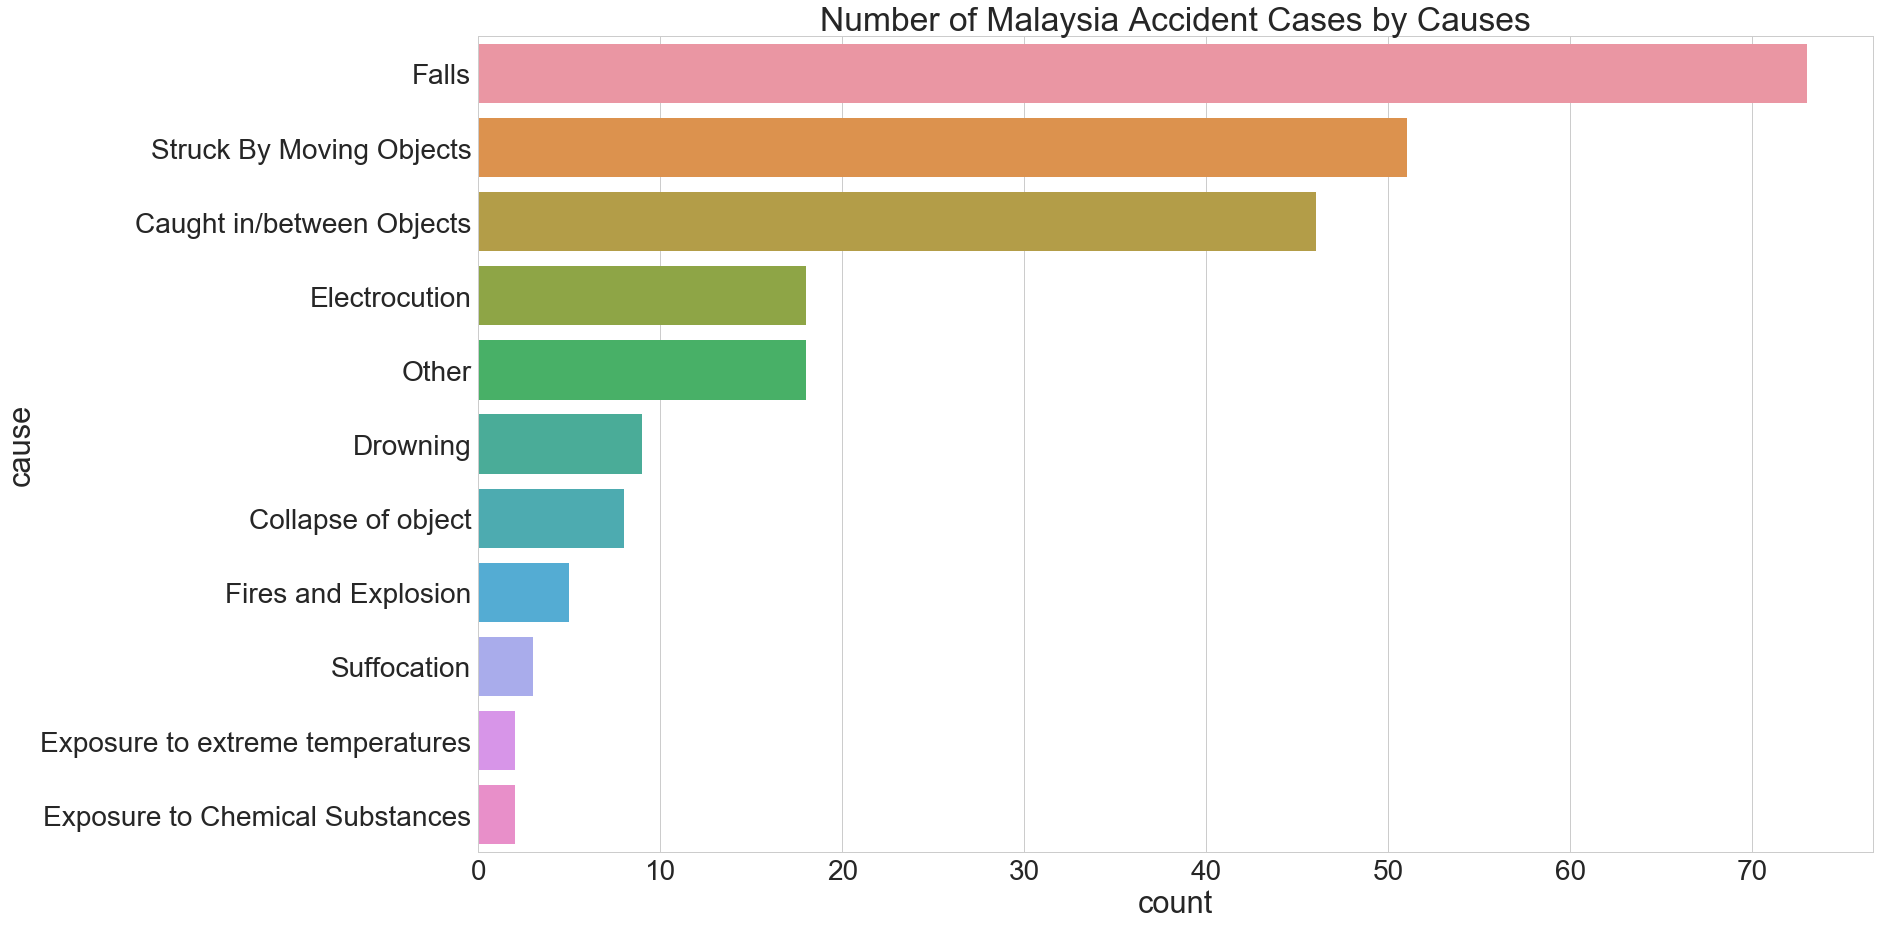

In [12]:
# plot the barchart of total number of "Malaysia" accidents by 'cause'
plt.figure(figsize=(25,15))
sns.set(style="whitegrid", font_scale=2.8)
ax = sns.countplot(y="cause", data=df_msia, order=df_msia['cause'].value_counts().index)
ax.set_title('Number of Malaysia Accident Cases by Causes')
plt.show()

## 3.0 Data Modelling

In [13]:
# Function to plot Confusion Matrix
import itertools
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#     print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Naive Bayes

In [14]:
# define the test train split random_state seed
seed = 30

In [15]:
# perform test train split for classification model building
X_train, X_test, y_train, y_test = train_test_split(df_msia['title_processed'], df_msia['cause'], test_size=0.3, random_state=seed)

In [16]:
# define the pipeline for classification model building and build the model to classify cause of accidents using Naive Bayes
mnb = Pipeline([('vect', CountVectorizer()),  
                ('tfidf', TfidfTransformer(use_idf=True)),
                ('clf', MultinomialNB()),
                ])
mnb.fit(X_train,y_train) 
y_predicted = mnb.predict(X_test)

In [17]:
# evaluate the confusion matrix and accuracy of model built using test data 
print(confusion_matrix(y_test, y_predicted))
print(np.mean(y_predicted == y_test) )

[[12  0  0  0  0  0  0  1  0]
 [ 2  0  0  0  2  0  0  0  0]
 [ 0  0  0  0  2  0  0  0  0]
 [ 1  0  0  2  0  0  0  1  0]
 [ 0  0  0  0 23  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  1  0  1  1  0]
 [ 4  0  0  0  0  0  0 16  0]
 [ 0  0  0  0  1  0  0  0  0]]
0.760563380282


In [18]:
print(classification_report(y_test, y_predicted))

                           precision    recall  f1-score   support

Caught in/between Objects       0.63      0.92      0.75        13
       Collapse of object       0.00      0.00      0.00         4
                 Drowning       0.00      0.00      0.00         2
            Electrocution       1.00      0.50      0.67         4
                    Falls       0.77      1.00      0.87        23
      Fires and Explosion       0.00      0.00      0.00         1
                    Other       1.00      0.33      0.50         3
 Struck By Moving Objects       0.84      0.80      0.82        20
              Suffocation       0.00      0.00      0.00         1

              avg / total       0.70      0.76      0.71        71



C:\Users\purpl\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Confusion matrix, without normalization


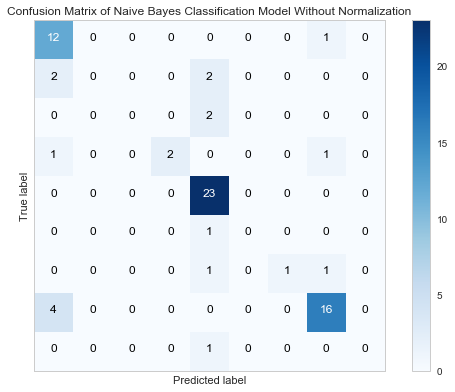

In [19]:
# plot the confusion matrix of classification model
sns.set(style="whitegrid", font_scale=1)
cnf_matrix = confusion_matrix(y_test, y_predicted)
plot_confusion_matrix(cnf_matrix, classes=[],
                      title='Confusion Matrix of Naive Bayes Classification Model Without Normalization')
plt.figure()
plt.show()

## Decision Tree

In [20]:
# define the pipeline for classification model building and build the model to classify cause of accidents using Decision Tree
dt = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer(use_idf=True)),
               ('clf', DecisionTreeClassifier())
              ])
dt.fit(X_train, y_train) 
y_predicted = dt.predict(X_test)

In [21]:
# evaluate the confusion matrix and accuracy of model built using test data 
print(confusion_matrix(y_test, y_predicted))
print(np.mean(y_predicted == y_test) )

[[10  0  0  0  0  0  0  3  0]
 [ 1  0  0  0  0  0  0  3  0]
 [ 0  0  2  0  0  0  0  0  0]
 [ 0  0  0  3  0  0  0  0  1]
 [ 0  0  0  0 22  0  0  1  0]
 [ 0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  2  1  0]
 [ 5  0  0  0  0  1  1 13  0]
 [ 0  0  0  0  0  0  0  1  0]]
0.746478873239


In [22]:
print(classification_report(y_test, y_predicted))

                           precision    recall  f1-score   support

Caught in/between Objects       0.62      0.77      0.69        13
       Collapse of object       0.00      0.00      0.00         4
                 Drowning       1.00      1.00      1.00         2
            Electrocution       1.00      0.75      0.86         4
                    Falls       1.00      0.96      0.98        23
      Fires and Explosion       0.50      1.00      0.67         1
                    Other       0.67      0.67      0.67         3
 Struck By Moving Objects       0.59      0.65      0.62        20
              Suffocation       0.00      0.00      0.00         1

              avg / total       0.72      0.75      0.73        71



C:\Users\purpl\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Confusion matrix, without normalization


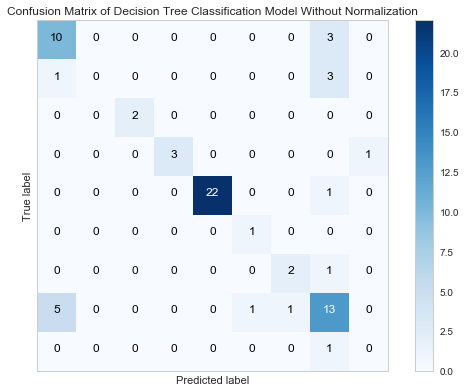

In [23]:
# plot the confusion matrix of classification model
sns.set(style="whitegrid", font_scale=1)
cnf_matrix = confusion_matrix(y_test, y_predicted)
plot_confusion_matrix(cnf_matrix, classes=[],
                      title='Confusion Matrix of Decision Tree Classification Model Without Normalization')
plt.figure()
plt.show()

## SVM

In [24]:
# define the pipeline for classification model building and build the model to classify cause of accidents using Support Vector Classification
SVM = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer(use_idf=False)),
                ('clf', SGDClassifier(alpha=1e-05))
                ])
SVM.fit(X_train, y_train) 
y_predicted = SVM.predict(X_test)

In [25]:
# perform grid seach to search for best parameter for Support Vector Classifcation
parameters = {
    'tfidf__use_idf': (True, False),
    'clf__alpha': (1, 1e-5),
}

SVM_gs = GridSearchCV(SVM, parameters, n_jobs=-1)
SVM_gs = SVM_gs.fit(X_train, y_train)
for param_name in sorted(parameters.keys()):
    print("%s: %r" % (param_name, SVM_gs.best_params_[param_name]))

C:\Users\purpl\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:581: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


clf__alpha: 1e-05
tfidf__use_idf: False


In [26]:
# evaluate the confusion matrix and accuracy of model built using test data 
print(confusion_matrix(y_test, y_predicted))
print(np.mean(y_predicted == y_test) )

[[11  0  0  0  0  0  0  2  0]
 [ 1  1  0  0  0  0  2  0  0]
 [ 0  0  2  0  0  0  0  0  0]
 [ 0  0  0  3  0  0  1  0  0]
 [ 1  0  0  0 21  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  1]
 [ 0  0  0  0  1  0  1  1  0]
 [ 3  0  0  0  0  0  0 16  1]
 [ 1  0  0  0  0  0  0  0  0]]
0.774647887324


In [27]:
print(classification_report(y_test, y_predicted))

                           precision    recall  f1-score   support

Caught in/between Objects       0.65      0.85      0.73        13
       Collapse of object       1.00      0.25      0.40         4
                 Drowning       1.00      1.00      1.00         2
            Electrocution       1.00      0.75      0.86         4
                    Falls       0.95      0.91      0.93        23
      Fires and Explosion       0.00      0.00      0.00         1
                    Other       0.25      0.33      0.29         3
 Struck By Moving Objects       0.80      0.80      0.80        20
              Suffocation       0.00      0.00      0.00         1

              avg / total       0.80      0.77      0.77        71



C:\Users\purpl\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Confusion matrix, without normalization


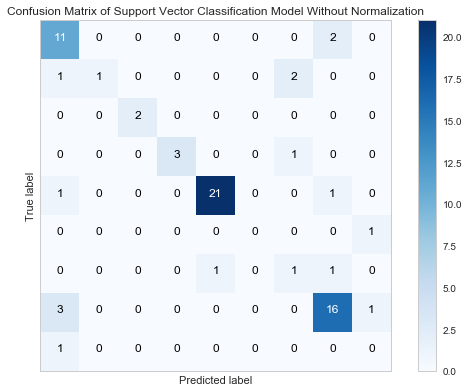

In [28]:
# plot the confusion matrix of classification model
sns.set(style="whitegrid", font_scale=1)
cnf_matrix = confusion_matrix(y_test, y_predicted)
plot_confusion_matrix(cnf_matrix, classes=[],
                      title='Confusion Matrix of Support Vector Classification Model Without Normalization')
plt.figure()
plt.show()

## Neural network

In [29]:
# define the pipeline for classification model building and build the model to classify cause of accidents using Neural Network Classification
NN = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer(use_idf=True)),
               ('clf', MLPClassifier(activation='tanh', solver='lbfgs', alpha=0.001, max_iter=50000, hidden_layer_sizes=(50,50), verbose=True))
               ])
NN.fit(X_train, y_train) 
y_predicted = NN.predict(X_test)

In [30]:
# evaluate the confusion matrix and accuracy of model built using test data 
print(confusion_matrix(y_test, y_predicted))
print(np.mean(y_predicted == y_test) )

[[10  0  0  0  0  0  0  3  0]
 [ 1  1  0  0  0  0  2  0  0]
 [ 0  0  2  0  0  0  0  0  0]
 [ 0  0  0  3  0  0  1  0  0]
 [ 1  0  0  0 22  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  1  0  1  1  0]
 [ 3  0  0  0  0  1  0 16  0]
 [ 0  0  0  0  1  0  0  0  0]]
0.788732394366


In [31]:
print(classification_report(y_test, y_predicted))

                           precision    recall  f1-score   support

Caught in/between Objects       0.67      0.77      0.71        13
       Collapse of object       1.00      0.25      0.40         4
                 Drowning       1.00      1.00      1.00         2
            Electrocution       1.00      0.75      0.86         4
                    Falls       0.92      0.96      0.94        23
      Fires and Explosion       0.50      1.00      0.67         1
                    Other       0.25      0.33      0.29         3
 Struck By Moving Objects       0.80      0.80      0.80        20
              Suffocation       0.00      0.00      0.00         1

              avg / total       0.80      0.79      0.78        71



C:\Users\purpl\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Confusion matrix, without normalization


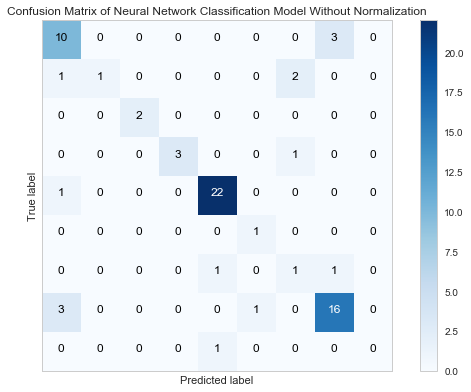

In [32]:
# plot the confusion matrix of classification model
sns.set(style="whitegrid", font_scale=1)
cnf_matrix = confusion_matrix(y_test, y_predicted)
plot_confusion_matrix(cnf_matrix, classes=[],
                      title='Confusion Matrix of Neural Network Classification Model Without Normalization')
plt.figure()
plt.show()

## Random Forest

In [33]:
# define the pipeline for classification model building and build the model to classify cause of accidents using Random Forest Classification
rfc = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer(use_idf=True)),
                ('clf', RandomForestClassifier(n_estimators=10000, class_weight='balanced'))
                ])
rfc.fit(X_train, y_train) 
y_predicted = rfc.predict(X_test)

In [34]:
# evaluate the confusion matrix and accuracy of model built using test data 
print(confusion_matrix(y_test, y_predicted))
print(np.mean(y_predicted == y_test) )

[[11  0  0  0  0  0  0  2  0]
 [ 2  0  0  0  0  0  1  1  0]
 [ 0  0  2  0  0  0  0  0  0]
 [ 0  0  0  3  0  0  1  0  0]
 [ 0  0  0  0 22  0  0  1  0]
 [ 0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  2  1  0]
 [ 4  0  0  0  0  1  1 14  0]
 [ 0  0  0  0  1  0  0  0  0]]
0.774647887324


In [35]:
print(classification_report(y_test, y_predicted))

                           precision    recall  f1-score   support

Caught in/between Objects       0.65      0.85      0.73        13
       Collapse of object       0.00      0.00      0.00         4
                 Drowning       1.00      1.00      1.00         2
            Electrocution       1.00      0.75      0.86         4
                    Falls       0.96      0.96      0.96        23
      Fires and Explosion       0.50      1.00      0.67         1
                    Other       0.40      0.67      0.50         3
 Struck By Moving Objects       0.74      0.70      0.72        20
              Suffocation       0.00      0.00      0.00         1

              avg / total       0.74      0.77      0.75        71



C:\Users\purpl\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Confusion matrix, without normalization


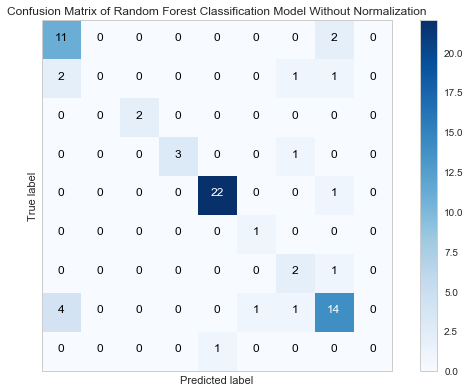

In [36]:
# plot the confusion matrix of classification model
sns.set(style="whitegrid", font_scale=1)
cnf_matrix = confusion_matrix(y_test, y_predicted)
plot_confusion_matrix(cnf_matrix, classes=[],
                      title='Confusion Matrix of Random Forest Classification Model Without Normalization')
plt.figure()
plt.show()

## Voting Ensemble

In [37]:
# build an voting ensemble models of 5 classification model to classify cause of accidents using Random Forest Classification
vc = VotingClassifier(estimators=[('dt', dt), ('mnb', mnb), ('SVM', SVM), ('NN', NN), ('rfc', rfc)], voting='hard').fit(X_train, y_train)
y_predicted = vc.predict(X_test)

In [38]:
# evaluate the confusion matrix and accuracy of model built using test data 
print(confusion_matrix(y_test, y_predicted))
print(np.mean(y_predicted == y_test) )

[[12  0  0  0  0  0  0  1  0]
 [ 2  0  0  0  0  0  1  1  0]
 [ 0  0  2  0  0  0  0  0  0]
 [ 0  0  0  3  0  0  1  0  0]
 [ 0  0  0  0 23  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  1  0  1  1  0]
 [ 3  0  0  0  0  1  0 16  0]
 [ 0  0  0  0  1  0  0  0  0]]
0.816901408451


In [39]:
print(classification_report(y_test, y_predicted))

                           precision    recall  f1-score   support

Caught in/between Objects       0.71      0.92      0.80        13
       Collapse of object       0.00      0.00      0.00         4
                 Drowning       1.00      1.00      1.00         2
            Electrocution       1.00      0.75      0.86         4
                    Falls       0.92      1.00      0.96        23
      Fires and Explosion       0.50      1.00      0.67         1
                    Other       0.33      0.33      0.33         3
 Struck By Moving Objects       0.84      0.80      0.82        20
              Suffocation       0.00      0.00      0.00         1

              avg / total       0.77      0.82      0.79        71



C:\Users\purpl\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Confusion matrix, without normalization


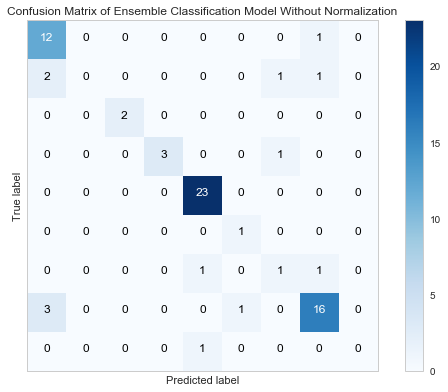

In [40]:
# plot the confusion matrix of classification model
sns.set(style="whitegrid", font_scale=1)
cnf_matrix = confusion_matrix(y_test, y_predicted)
plot_confusion_matrix(cnf_matrix, classes=[],
                      title='Confusion Matrix of Ensemble Classification Model Without Normalization')
plt.figure()
plt.show()

## 4.0 Classification Osha Accident Cases Cause

In [41]:
# perform necessary data preprocessing before fit into the built classfication model to classify Osha Accident Cases Causes
count_vect = CountVectorizer( )
osha_title = df_osha['title_processed']
osha_title_counts = count_vect.fit_transform(osha_title)
tf_transformer = TfidfTransformer(use_idf=False).fit(osha_title_counts)
osha_title_tf = tf_transformer.transform(osha_title_counts)

In [42]:
osha_cause = vc.predict(osha_title)

In [43]:
df_osha['cause'] = pd.Series(osha_cause)

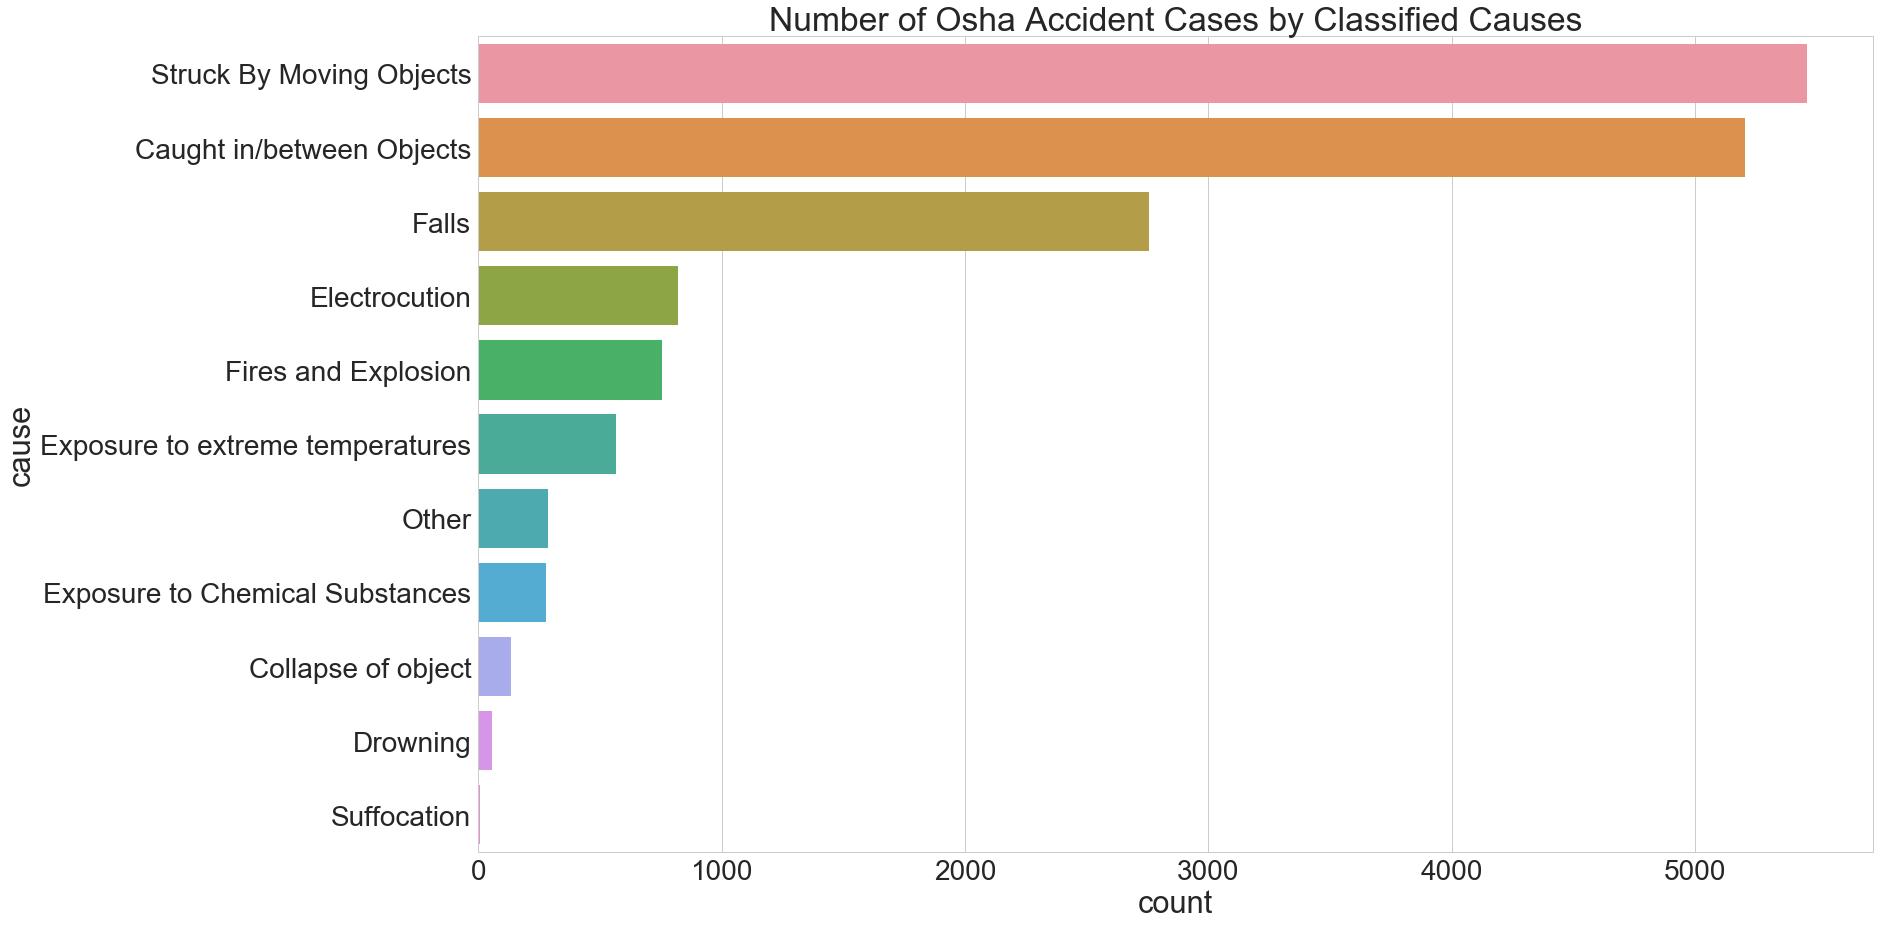

In [45]:
# plot the barchart of total number of Osha accident cases by cause
plt.figure(figsize=(25,15))
sns.set(style="whitegrid", font_scale=2.8)
ax = sns.countplot(y="cause", data=df_osha, order=df_osha['cause'].value_counts().index)
ax.set_title('Number of Osha Accident Cases by Classified Causes')
plt.show()

In [46]:
# export the Osha Accident Cases with labelled causes
df_osha.to_csv('osha_clean_cause_labelled.csv')